
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this Data Analysis process I am using TMDb movies dataset. This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue. it consists of 21 columns.

Question :
* What is the difference between the budget and revenue from 1960 to 2015?
* What is the Average runtime of all the movies?
* What is the 10 most popular movies?


In [32]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section I will load data, check for cleanliness, and then trim and clean the dataset for analysis.


### General Properties

In [33]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
file_name = 'tmdb-movies.csv'
df = pd.read_csv(file_name)
#printing first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [35]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [36]:
# check for column's name
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [37]:
df.shape

(10866, 21)

In [38]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Show every columns (visualization for columns)

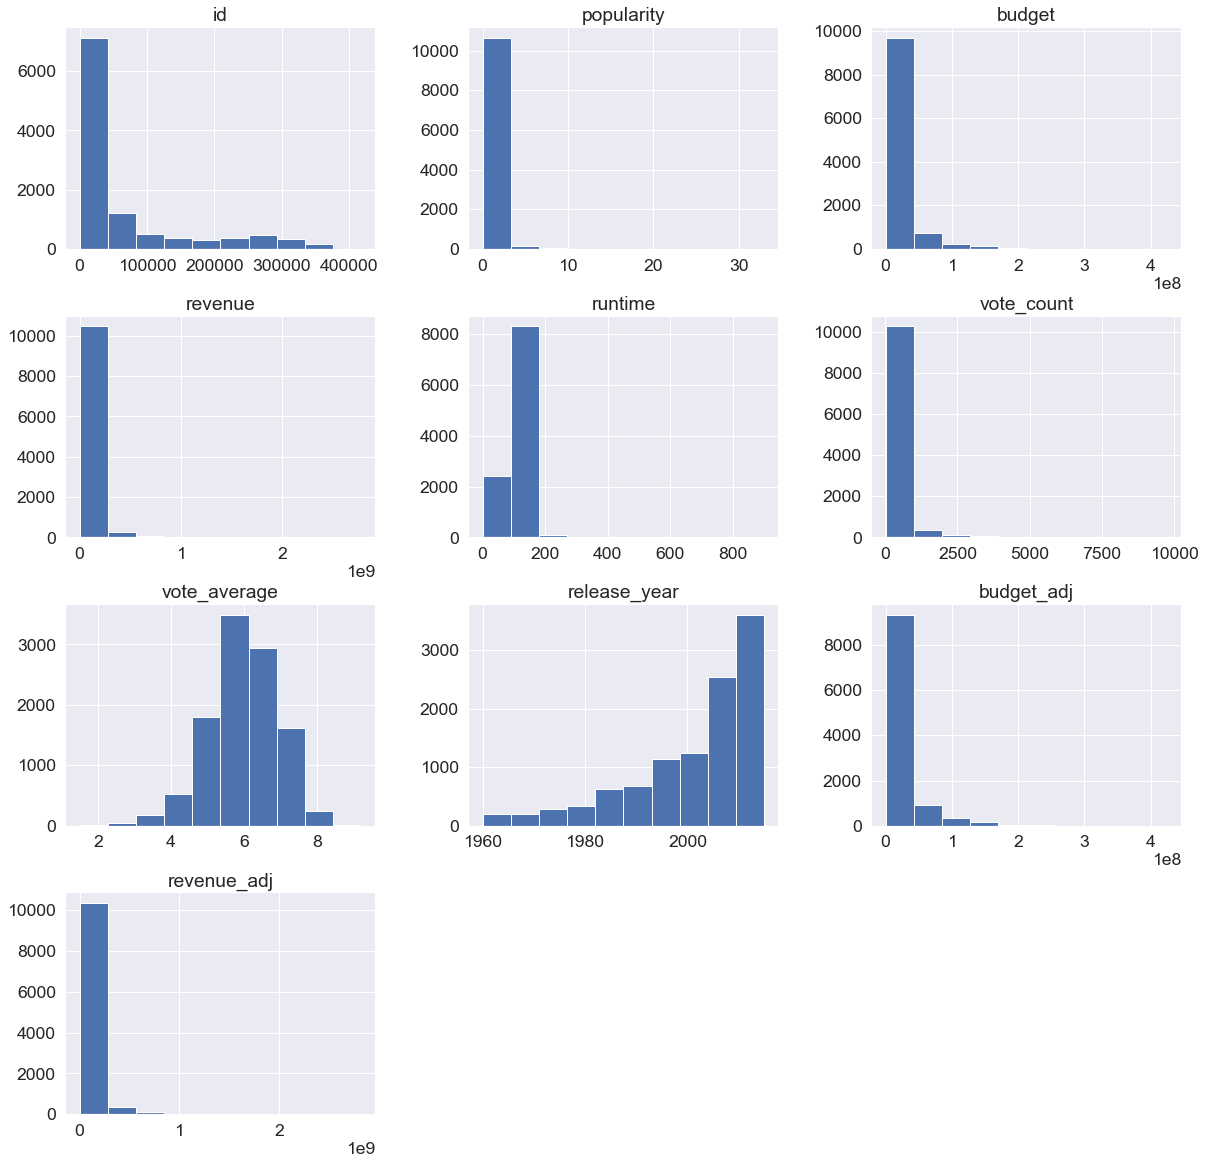

In [39]:
df.hist(figsize =(20,20));


### Data Cleaning:
* i will drop some columns to be readable such as( homepage , tagline ,etc)

In [40]:
# check for missing data
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

In [41]:
#check for duplicated rows
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [42]:
# drop duplicates row in data set
df.drop_duplicates(inplace = True)

In [43]:
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [44]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool

In [45]:
#check for duplicates rows 
sum(df.duplicated())

0

In [46]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

Now we have 0 duplicated rows

In [47]:
# checking for NAN values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I drop some columns that isn't neccesary for my questions

In [48]:
# check number of NaN in each column

NaN_col = list()

def Check_NaN(column):
    NaN_sum = df[column].isnull().sum()
    if(NaN_sum > 700):
        NaN_col.append(column)
        print(f"Column '{column}' has {NaN_sum} Null values.")
    
for col in list(df.columns):
    Check_NaN(col)


Column 'homepage' has 7929 Null values.
Column 'tagline' has 2824 Null values.
Column 'keywords' has 1493 Null values.
Column 'production_companies' has 1030 Null values.


In [49]:
df.drop(NaN_col , axis = 1 , inplace = True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   imdb_id         10855 non-null  object 
 2   popularity      10865 non-null  float64
 3   budget          10865 non-null  int64  
 4   revenue         10865 non-null  int64  
 5   original_title  10865 non-null  object 
 6   cast            10789 non-null  object 
 7   director        10821 non-null  object 
 8   overview        10861 non-null  object 
 9   runtime         10865 non-null  int64  
 10  genres          10842 non-null  object 
 11  release_date    10865 non-null  object 
 12  vote_count      10865 non-null  int64  
 13  vote_average    10865 non-null  float64
 14  release_year    10865 non-null  int64  
 15  budget_adj      10865 non-null  float64
 16  revenue_adj     10865 non-null  float64
dtypes: float64(4), int64(6), object

Now,  I finished cleaning the data i will show some question and how the data answered to it ?

<a id='eda'></a>
## Exploratory Data Analysis:
In this section i will ask 3 questions and the data will answer it:
* What is the 10 most vote average?
* What is the Average runtime of all the movies?
* What is the 10 most popular movies?

### Research Question 1 (What is the difference between the budget and revenue from 1960 to 2015?)

In [51]:
# make a relation  to can compare by budget and revenue with release_year from 1960 until 2015
budget_of_movies = df.groupby('release_year')['budget'].sum()
revenue_of_movies= df.groupby('release_year')['revenue'].sum()

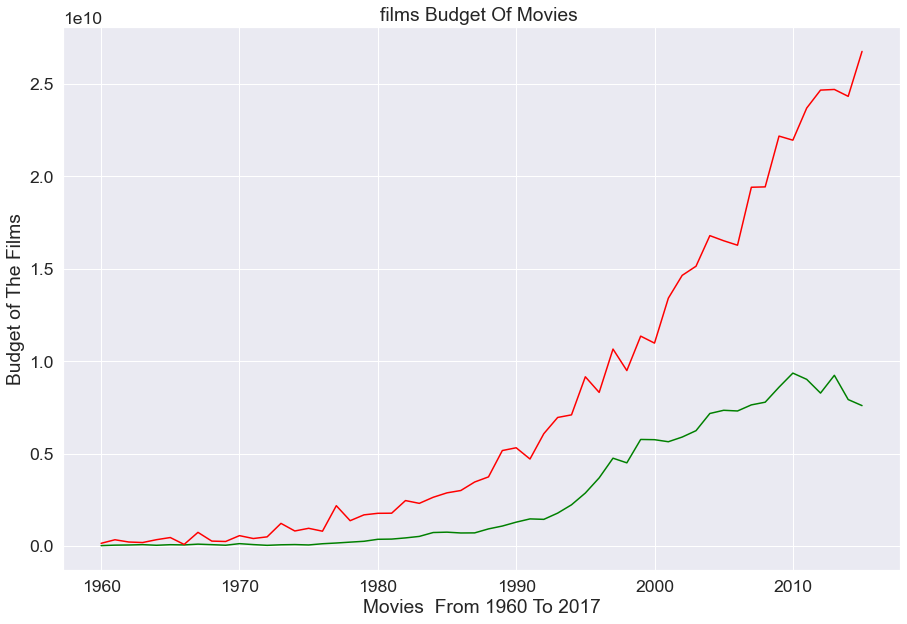

In [52]:
plt.figure(figsize=(15,10))

# Give title and names to x and y axis
plt.title("films Budget Of Movies ")
plt.xlabel('Movies  From 1960 To 2017')
plt.ylabel('Budget of The Films',rotation=90)
# green color of budget_of_movies
plt.plot(budget_of_movies,'green')
# red color of revenue_of_movies
plt.plot(revenue_of_movies,'red')

# Display the graph
plt.show()

### Research Question 2  ( What is the Average runtime of all the movies?)

In [53]:
# average runtime
df['runtime'].mean()

102.07179015186378

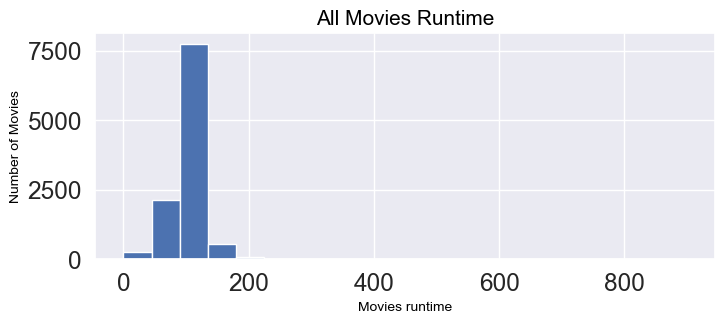

In [54]:
# figure size
plt.figure(figsize=(8,3), dpi = 100)
# x-axis 
plt.xlabel('Movies runtime', fontsize = 10, color='black')
# y-axis 
plt.ylabel('Number of Movies', fontsize=10, color='black')
#Name of the graph
plt.title('All Movies Runtime', fontsize=15, color='black')
#giving a histogram plot
plt.hist(df['runtime'], rwidth = 1.3, bins =20)
#displays the plot
plt.show()

### Research Question 3  (What is the 10 most popular movies?)

In [55]:
# the popularity in ascending order
df.sort_values(by='popularity' , inplace = True , ascending = False)
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,tt0816692,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08
630,118340,tt2015381,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,7/30/14,5612,7.9,2014,1.565855e+08,7.122911e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
631,100402,tt1843866,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,3/20/14,3848,7.6,2014,1.565855e+08,6.583651e+08
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,3/20/77,4428,7.9,1977,3.957559e+07,2.789712e+09
632,245891,tt2911666,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,10/22/14,2712,7.0,2014,1.842182e+07,7.252661e+07
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
633,131631,tt1951265,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Katniss Everdeen reluctantly becomes the symbo...,123,Science Fiction|Adventure|Thriller,11/18/14,3590,6.6,2014,1.151364e+08,6.927528e+08


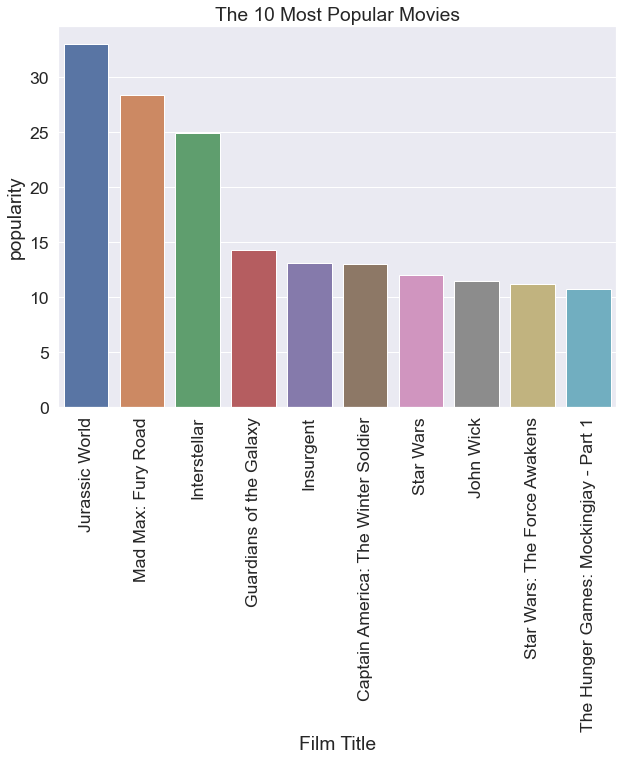

In [56]:
# figure size
sns.set(rc={'figure.figsize':(10,7)} , font_scale = 1.6)
graph1 = sns.barplot(
x = df.original_title.head(10),
y = df.popularity.head(10))
# give title and names to x , y axis 
graph1.tick_params(axis = 'x' , rotation =90)
graph1.set(xlabel = 'Film Title' , ylabel = 'popularity' , title = 'The 10 Most Popular Movies')
# display the graph
plt.show()

<a id='conclusions'></a>
## Conclusions:
* Budgets increase and decrease in periods from 1960 to untill 2010.

* Budgets spent on movies are increased over years, but it decrease starts from 2010.

* Most movies of runtime is between (50 : 170) minute

* Top 3 popular movies (Jurassic World - Mad Max : Fury Road -Interstellar)
## Limitation:
* There is no data after 2015

* There is lots of missed data in runtime column

* I want to ask another question and i have a missed in data .

